In [ ]:
# unzip data

!unzip employee_data


Archive:  employee_data.zip
  inflating: employee.csv            
  inflating: department.csv          
  inflating: department_employee.csv  
  inflating: salary.csv              
  inflating: title.csv               
  inflating: department_manager.csv  


In [ ]:
import pandas as pd
import numpy as np
import zipfile
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
print(zipfile.is_zipfile("employee_data.zip"))  # Should return True


True


In [ ]:

df_emp = pd.read_csv("employee.csv")
df_dept = pd.read_csv("department.csv")
df_dept_emp = pd.read_csv("department_employee.csv")
df_salary = pd.read_csv("salary.csv")
df_title = pd.read_csv("title.csv")
df_dept_mgr = pd.read_csv("department_manager.csv")


In [ ]:
# get the info of all tables

print(df_emp.info())
print(df_dept.info())
print(df_dept_emp.info())
print(df_salary.info())
print(df_title.info())
print(df_dept_mgr.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9 non-null      object
 1   dept_name  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0

In [ ]:

# Create a mapping between department ID and department name
dept_id_to_name = dict(zip(df_dept['id'], df_dept['dept_name']))
dept_id_to_name

{'d009': 'Customer Service',
 'd005': 'Development',
 'd002': 'Finance',
 'd003': 'Human Resources',
 'd001': 'Marketing',
 'd004': 'Production',
 'd006': 'Quality Management',
 'd008': 'Research',
 'd007': 'Sales'}

In [ ]:
# churn rates by year by month by time.


# **get terminated employees ids and terminated date**

In [ ]:
df_dept_emp.head(40)

,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
5,10006,d005,1990-08-05,9999-01-01
6,10007,d008,1989-02-10,9999-01-01
7,10008,d005,1998-03-11,2000-07-31
8,10009,d006,1985-02-18,9999-01-01
9,10010,d004,1996-11-24,2000-06-26


In [ ]:

# Step 1: Identify employees with any '9999-01-01' record (active employees)
active_ids = df_dept_emp[df_dept_emp['to_date'] == '9999-01-01']['employee_id'].unique()

# Step 2: Exclude all records of these active employees
terminated_df = df_dept_emp[~df_dept_emp['employee_id'].isin(active_ids)]

# Step 3: Find the latest 'to_date' for each employee (max termination date)
latest_terminated_df = terminated_df.loc[terminated_df.groupby('employee_id')['to_date'].idxmax()]

# Step 4: Count terminated employees
terminated_employees = latest_terminated_df['employee_id'].nunique()

print("Terminated employees:", terminated_employees)
latest_terminated_data = latest_terminated_df[['employee_id', 'to_date']].reset_index(drop=True)
print(latest_terminated_data)

Terminated employees: 59900
       employee_id     to_date
0            10008  2000-07-31
1            10011  1996-11-09
2            10015  1993-08-22
3            10021  2002-07-15
4            10025  1997-10-15
...            ...         ...
59895       499978  1997-12-14
59896       499982  2000-05-16
59897       499988  2001-10-09
59898       499989  2001-03-07
59899       499994  1993-10-27

[59900 rows x 2 columns]


In [ ]:
# Get active employees
active_employees_df = df_dept_emp[df_dept_emp['to_date'] == '9999-01-01']

active_employees_df


,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


# ***simple clutering cases:***


1.    Demographic Clustering:
Group employees based on demographic characteristics.
2.   Employee Tenure Clustering:




In [ ]:
# features preparation


# ***1- Gender with Salary progress***

Use Case: Identify gender-based salary disparities across different job roles.


In [ ]:
print(df_emp.info())
print(df_salary.info())
print(df_title.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   employee_id  int64 
 1   amount       int64 
 2   from_date    object
 3   to_date      object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   -

In [ ]:
df_salary["from_date"] = pd.to_datetime(df_salary["from_date"], errors='coerce')
df_salary["to_date"] = pd.to_datetime(df_salary["to_date"], errors='coerce')
df_title["from_date"] = pd.to_datetime(df_title["from_date"], errors='coerce')
df_title["to_date"] = pd.to_datetime(df_title["to_date"], errors='coerce')

<ipython-input-12-3be4ba96dd6b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_title["to_date"] = pd.to_datetime(df_title["to_date"], errors='coerce')


In [ ]:
# merge salary and emopliyee tables to keep gender info only from employee table

merged_df = df_salary.merge(df_emp, left_on="employee_id", right_on="id", how="left")
merged_df = merged_df.drop(columns=["id","first_name","last_name"])
merged_df = merged_df.rename(columns={
    'from_date': 'salary_sd',
    'to_date': 'salary_ed'
})

print(merged_df.head(30))


    employee_id  amount  salary_sd  salary_ed  birth_date gender   hire_date
0         10001   60117 1986-06-26 1987-06-26  1953-09-02      M  1986-06-26
1         10001   62102 1987-06-26 1988-06-25  1953-09-02      M  1986-06-26
2         10001   66074 1988-06-25 1989-06-25  1953-09-02      M  1986-06-26
3         10001   66596 1989-06-25 1990-06-25  1953-09-02      M  1986-06-26
4         10001   66961 1990-06-25 1991-06-25  1953-09-02      M  1986-06-26
5         10001   71046 1991-06-25 1992-06-24  1953-09-02      M  1986-06-26
6         10001   74333 1992-06-24 1993-06-24  1953-09-02      M  1986-06-26
7         10001   75286 1993-06-24 1994-06-24  1953-09-02      M  1986-06-26
8         10001   75994 1994-06-24 1995-06-24  1953-09-02      M  1986-06-26
9         10001   76884 1995-06-24 1996-06-23  1953-09-02      M  1986-06-26
10        10001   80013 1996-06-23 1997-06-23  1953-09-02      M  1986-06-26
11        10001   81025 1997-06-23 1998-06-23  1953-09-02      M  1986-06-26

In [ ]:
# Current max date in the dataset
current_max_date = merged_df['salary_ed'].max()  # 2002-08-01

# Define new max reference date (extend analysis to 2003)
new_max_date = pd.Timestamp('2003-08-01')

In [ ]:

# Step 2: Replace NaT in salary_ed with max_date
merged_df['salary_ed'].fillna(new_max_date, inplace=True)
merged_df['salary_duration'] = np.ceil((merged_df['salary_ed'] - merged_df['salary_sd']).dt.days / 30)

merged_df.head(30)


<ipython-input-15-7197b2b69b0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['salary_ed'].fillna(new_max_date, inplace=True)


,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,M,1986-06-26,13.0
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,M,1986-06-26,13.0
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,M,1986-06-26,13.0
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,M,1986-06-26,13.0
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,M,1986-06-26,13.0
5,10001,71046,1991-06-25,1992-06-24,1953-09-02,M,1986-06-26,13.0
6,10001,74333,1992-06-24,1993-06-24,1953-09-02,M,1986-06-26,13.0
7,10001,75286,1993-06-24,1994-06-24,1953-09-02,M,1986-06-26,13.0
8,10001,75994,1994-06-24,1995-06-24,1953-09-02,M,1986-06-26,13.0
9,10001,76884,1995-06-24,1996-06-23,1953-09-02,M,1986-06-26,13.0


In [ ]:
merged_df['salary_duration'].value_counts()

,count
salary_duration,
13.0,2561747
21.0,20025
24.0,19964
18.0,19896
16.0,19792
15.0,19773
20.0,19722
14.0,19705
22.0,19674


In [ ]:
# get unique vlaues in merged_df['salary_duration'] that are less than 1 then records with these values


# Find unique salary durations less than 1
unique_short_durations = merged_df.loc[merged_df['salary_duration'] < 1, 'salary_duration'].unique()

# Get records with these durations
short_duration_records = merged_df[merged_df['salary_duration'].isin(unique_short_durations)]

short_duration_records


,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration
8228,10867,48248,2002-03-22,2002-03-22,1952-10-01,M,1986-10-08,0.0
12490,11315,85452,2002-01-17,2002-01-17,1955-04-21,M,1999-07-17,0.0
40508,14256,48468,1995-05-31,1995-05-31,1952-09-05,F,1993-12-14,0.0
43133,14539,42975,1998-12-17,1998-12-17,1954-10-17,M,1985-11-23,0.0
72530,17634,51140,2001-07-24,2001-07-24,1962-08-09,F,1993-03-20,0.0
...,...,...,...,...,...,...,...,...
2713523,486186,46398,1996-04-30,1996-04-30,1953-08-24,F,1991-12-31,0.0
2728751,487782,52350,1998-05-05,1998-05-05,1954-11-13,M,1986-11-05,0.0
2753427,490376,86161,1999-11-12,1999-11-12,1955-01-10,F,1996-11-12,0.0
2826313,498093,50817,1998-02-10,1998-02-10,1953-02-01,F,1991-02-18,0.0


In [ ]:
# drop rows with salary_sd = salary_ed as this is not accurate

# Find rows where salary_sd and salary_ed are equal
invalid_salary_rows = merged_df[merged_df['salary_sd'] == merged_df['salary_ed']]

# Drop these rows
merged_df = merged_df.drop(invalid_salary_rows.index).reset_index(drop=True)
print(invalid_salary_rows['employee_id'].nunique())
merged_df['salary_duration'].value_counts()

178


,count
salary_duration,
13.0,2561747
21.0,20025
24.0,19964
18.0,19896
16.0,19792
15.0,19773
20.0,19722
14.0,19705
22.0,19674


In [ ]:
merged_df['employee_id'].nunique()

300002

In [ ]:
# Access the merged_df DataFrame (assuming it's already created as in your code)
employee_record = merged_df[merged_df['employee_id'] == 10867]
employee_record


,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration
8223,10867,40000,1997-03-23,1998-03-23,1952-10-01,M,1986-10-08,13.0
8224,10867,44223,1998-03-23,1999-03-23,1952-10-01,M,1986-10-08,13.0
8225,10867,44054,1999-03-23,2000-03-22,1952-10-01,M,1986-10-08,13.0
8226,10867,46766,2000-03-22,2001-03-22,1952-10-01,M,1986-10-08,13.0
8227,10867,46330,2001-03-22,2002-03-22,1952-10-01,M,1986-10-08,13.0


In [ ]:
# next step is to detect salary icrease for each employee over time in extra two columns

# Group by employee ID and sort by salary start date
merged_df.sort_values(by=['employee_id', 'salary_sd'], inplace=True)

# Calculate salary increase
merged_df['salary_increase'] = merged_df.groupby('employee_id')['amount'].diff()

# Calculate percentage salary increase
merged_df['percentage_increase'] = (merged_df['salary_increase'] / merged_df.groupby('employee_id')['amount'].shift(1)) * 100

merged_df.head(30)


,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration,salary_increase,percentage_increase
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,M,1986-06-26,13.0,NaN,NaN
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,M,1986-06-26,13.0,1985.0,3.301895
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,M,1986-06-26,13.0,3972.0,6.395929
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,M,1986-06-26,13.0,522.0,0.790023
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,M,1986-06-26,13.0,365.0,0.548081
5,10001,71046,1991-06-25,1992-06-24,1953-09-02,M,1986-06-26,13.0,4085.0,6.100566
6,10001,74333,1992-06-24,1993-06-24,1953-09-02,M,1986-06-26,13.0,3287.0,4.626580
7,10001,75286,1993-06-24,1994-06-24,1953-09-02,M,1986-06-26,13.0,953.0,1.282069
8,10001,75994,1994-06-24,1995-06-24,1953-09-02,M,1986-06-26,13.0,708.0,0.940414
9,10001,76884,1995-06-24,1996-06-23,1953-09-02,M,1986-06-26,13.0,890.0,1.171145


In [ ]:
# Fill NaN (first salary record for each employee) with 0

merged_df[['salary_increase', 'percentage_increase']] = merged_df[['salary_increase', 'percentage_increase']].fillna(0)


In [ ]:
merged_df.head(30)

,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration,salary_increase,percentage_increase
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,M,1986-06-26,13.0,0.0,0.000000
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,M,1986-06-26,13.0,1985.0,3.301895
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,M,1986-06-26,13.0,3972.0,6.395929
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,M,1986-06-26,13.0,522.0,0.790023
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,M,1986-06-26,13.0,365.0,0.548081
5,10001,71046,1991-06-25,1992-06-24,1953-09-02,M,1986-06-26,13.0,4085.0,6.100566
6,10001,74333,1992-06-24,1993-06-24,1953-09-02,M,1986-06-26,13.0,3287.0,4.626580
7,10001,75286,1993-06-24,1994-06-24,1953-09-02,M,1986-06-26,13.0,953.0,1.282069
8,10001,75994,1994-06-24,1995-06-24,1953-09-02,M,1986-06-26,13.0,708.0,0.940414
9,10001,76884,1995-06-24,1996-06-23,1953-09-02,M,1986-06-26,13.0,890.0,1.171145


In [ ]:
# Convert gender to numerical values
merged_df['gender'] = merged_df['gender'].map({'M': 1, 'F': 0})
merged_df['gender'].value_counts()

,count
gender,
1,1706217
0,1137652


In [ ]:
df_salary_analysis = merged_df.copy()
df_salary_analysis.head(-20)

,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration,salary_increase,percentage_increase
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,1,1986-06-26,13.0,0.0,0.000000
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,1,1986-06-26,13.0,1985.0,3.301895
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,1,1986-06-26,13.0,3972.0,6.395929
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,1,1986-06-26,13.0,522.0,0.790023
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,1,1986-06-26,13.0,365.0,0.548081
...,...,...,...,...,...,...,...,...,...,...
2843844,499997,55380,1991-08-29,1992-08-28,1961-08-03,1,1986-04-21,13.0,2379.0,4.488595
2843845,499997,59420,1992-08-28,1993-08-28,1961-08-03,1,1986-04-21,13.0,4040.0,7.295052
2843846,499997,62902,1993-08-28,1994-08-28,1961-08-03,1,1986-04-21,13.0,3482.0,5.859980
2843847,499997,66977,1994-08-28,1995-08-28,1961-08-03,1,1986-04-21,13.0,4075.0,6.478331


In [ ]:
df_salary_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843869 entries, 0 to 2843868
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   employee_id          int64         
 1   amount               int64         
 2   salary_sd            datetime64[ns]
 3   salary_ed            datetime64[ns]
 4   birth_date           object        
 5   gender               int64         
 6   hire_date            object        
 7   salary_duration      float64       
 8   salary_increase      float64       
 9   percentage_increase  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 217.0+ MB


In [ ]:
df_salary_analysis['employee_id'].nunique()

300002

In [ ]:
df_salary_analysis['birth_date'] = pd.to_datetime(df_salary_analysis['birth_date'])
df_salary_analysis['hire_date'] = pd.to_datetime(df_salary_analysis['hire_date'])


In [ ]:
df_salary_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843869 entries, 0 to 2843868
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   employee_id          int64         
 1   amount               int64         
 2   salary_sd            datetime64[ns]
 3   salary_ed            datetime64[ns]
 4   birth_date           datetime64[ns]
 5   gender               int64         
 6   hire_date            datetime64[ns]
 7   salary_duration      float64       
 8   salary_increase      float64       
 9   percentage_increase  float64       
dtypes: datetime64[ns](4), float64(3), int64(3)
memory usage: 217.0 MB


In [ ]:
df_salary_analysis.isna().sum()

,0
employee_id,0
amount,0
salary_sd,0
salary_ed,0
birth_date,0
gender,0
hire_date,0
salary_duration,0
salary_increase,0
percentage_increase,0


In [ ]:
df_salary_analysis.describe()

,employee_id,amount,salary_sd,salary_ed,birth_date,gender,hire_date,salary_duration,salary_increase,percentage_increase
count,2.843869e+06,2.843869e+06,2843869,2843869,2843869,2.843869e+06,2843869,2.843869e+06,2.843869e+06,2.843869e+06
mean,2.530570e+05,6.381097e+04,1996-03-18 17:41:21.525696384,1997-03-30 04:41:14.539298048,1958-07-31 12:41:20.088921216,5.999633e-01,1989-03-12 23:00:20.645254912,1.334553e+01,1.788940e+03,3.025967e+00
min,1.000100e+04,3.862300e+04,1985-01-01 00:00:00,1985-03-01 00:00:00,1952-02-01 00:00:00,0.000000e+00,1985-01-01 00:00:00,1.000000e+00,-5.000000e+02,-1.266015e+00
25%,8.487800e+04,5.050700e+04,1993-03-01 00:00:00,1994-02-26 00:00:00,1955-04-28 00:00:00,0.000000e+00,1986-08-11 00:00:00,1.300000e+01,3.080000e+02,4.872408e-01
50%,2.497800e+05,6.114300e+04,1996-11-02 00:00:00,1997-10-28 00:00:00,1958-08-01 00:00:00,1.000000e+00,1988-07-05 00:00:00,1.300000e+01,1.705000e+03,2.705216e+00
75%,4.249170e+05,7.419300e+04,1999-09-30 00:00:00,2000-09-23 00:00:00,1961-10-30 00:00:00,1.000000e+00,1991-03-07 00:00:00,1.300000e+01,3.104000e+03,4.975213e+00
max,4.999990e+05,1.582200e+05,2002-08-01 00:00:00,2003-08-01 00:00:00,1965-02-01 00:00:00,1.000000e+00,2000-01-28 00:00:00,2.500000e+01,4.500000e+03,1.151092e+01
std,1.618448e+05,1.690482e+04,NaN,NaN,NaN,4.899055e-01,NaN,2.205325e+00,1.497223e+03,2.714343e+00


In [ ]:
#apply agregation to make each employee have one descriptive record
# Aggregate data per employee
# Group by employee_id and compute features

df_salary_analysis['age_at_hire'] = (df_salary_analysis['hire_date'] - df_salary_analysis['birth_date']).dt.days / 365
df_salary_analysis['tenure'] = (df_salary_analysis['salary_ed'] - df_salary_analysis['hire_date']).dt.days / 365

df_salary_analysis = df_salary_analysis.groupby('employee_id').agg(
    gender=('gender', 'first'),
    age_at_hire=('age_at_hire', 'first'),
    tenure=('tenure', 'last'),

    # Average, max, and median salary over time
    avg_salary=('amount', 'mean'),
    max_salary=('amount', 'max'),
    median_salary=('amount', 'median'),

    total_salary_increase=('salary_increase', 'sum'),
    avg_percentage_increase=('percentage_increase', 'mean'),
    num_salary_changes=('salary_sd', 'count')
).reset_index()



# Display final aggregated dataset
df_salary_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   employee_id              300002 non-null  int64  
 1   gender                   300002 non-null  int64  
 2   age_at_hire              300002 non-null  float64
 3   tenure                   300002 non-null  float64
 4   avg_salary               300002 non-null  float64
 5   max_salary               300002 non-null  int64  
 6   median_salary            300002 non-null  float64
 7   total_salary_increase    300002 non-null  float64
 8   avg_percentage_increase  300002 non-null  float64
 9   num_salary_changes       300002 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 22.9 MB


***feature selection:***

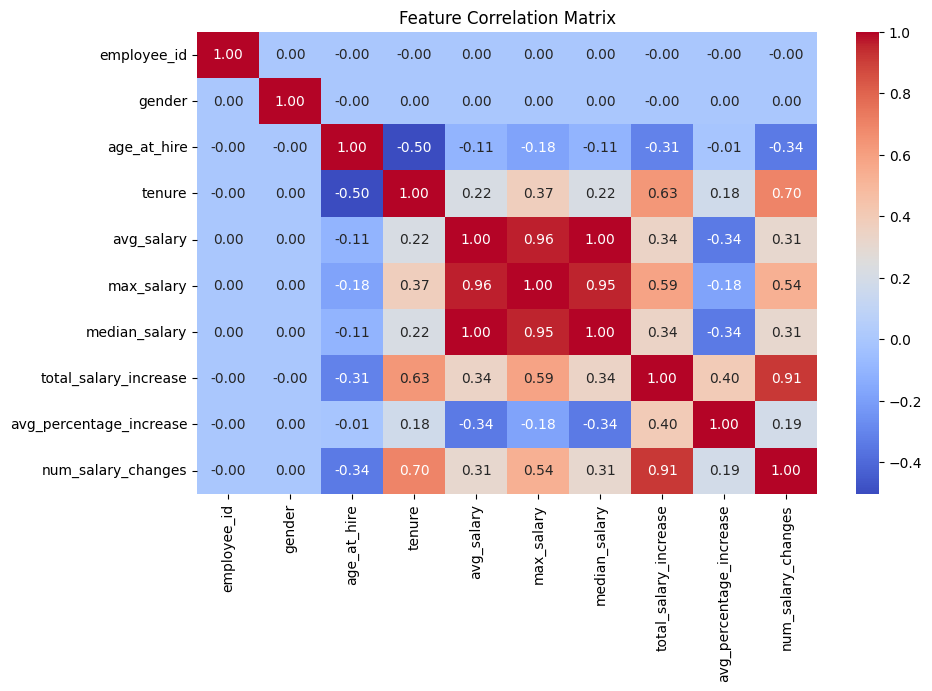

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_salary_analysis.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

highly correlated (above 0.8 or below -0.8), we remove one:

(medan,max,avg),

(numberofsalarychanges,total_salary_increase)  

<ipython-input-36-235330f11278>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_salary_analysis[feature], label=feature, shade=True)
<ipython-input-36-235330f11278>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_salary_analysis[feature], label=feature, shade=True)
<ipython-input-36-235330f11278>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_salary_analysis[feature], label=feature, shade=True)


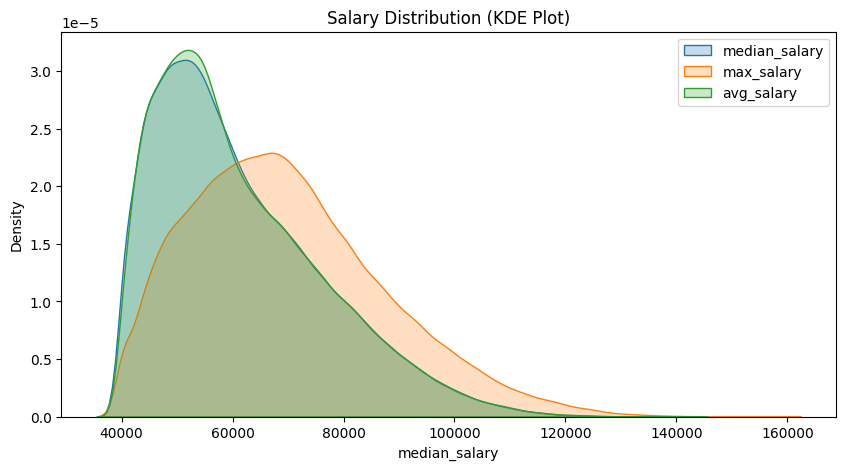

In [ ]:

features = ['median_salary', 'max_salary', 'avg_salary']

plt.figure(figsize=(10, 5))
for feature in features:
    sns.kdeplot(df_salary_analysis[feature], label=feature, shade=True)

plt.legend()
plt.title("Salary Distribution (KDE Plot)")
plt.show()

In [ ]:

#max_salary has high vaiation(spread out) so choose median_salary or avg_salary
#Keep total_salary_increase (captures overall growth better)
features = [
 'age_at_hire',
 'tenure',
 'median_salary',         # 'max_salary', 'avg_salary'
 'total_salary_increase', #'num_salary_changes'
 'avg_percentage_increase',
 ]
data = df_salary_analysis[features]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age_at_hire              300002 non-null  float64
 1   tenure                   300002 non-null  float64
 2   median_salary            300002 non-null  float64
 3   total_salary_increase    300002 non-null  float64
 4   avg_percentage_increase  300002 non-null  float64
dtypes: float64(5)
memory usage: 11.4 MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_hire,300002.0,31.517848,5.147165,20.041096,27.695890,31.457534,35.016438,47.909589
tenure,300002.0,12.281746,4.418300,0.002740,9.293151,13.030137,15.956164,18.591781
median_salary,300002.0,61451.161689,15340.933092,39171.000000,49509.000000,57971.000000,70774.500000,141903.500000
total_salary_increase,300002.0,16958.260022,10330.056891,-1377.000000,8456.000000,16123.000000,24711.000000,53875.000000
avg_percentage_increase,300002.0,2.919023,1.152141,-0.870648,2.225391,2.947253,3.678241,7.416769


In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_hire,300002.0,-7.611994e-16,1.000002,-2.229727,-0.742538,-0.011718,0.679713,3.184621
tenure,300002.0,-5.618698e-16,1.000002,-2.779129,-0.676414,0.169385,0.831638,1.428162
median_salary,300002.0,-7.301962e-17,1.000002,-1.452337,-0.778452,-0.226855,0.607744,5.244301
total_salary_increase,300002.0,-1.255284e-16,1.000002,-1.774946,-0.823062,-0.080857,0.750504,3.573727
avg_percentage_increase,300002.0,2.489488e-16,1.000002,-3.289249,-0.602038,0.024503,0.658965,3.903824


In [ ]:
data.columns

Index(['age_at_hire', 'tenure', 'median_salary', 'total_salary_increase',
       'avg_percentage_increase'],
      dtype='object')

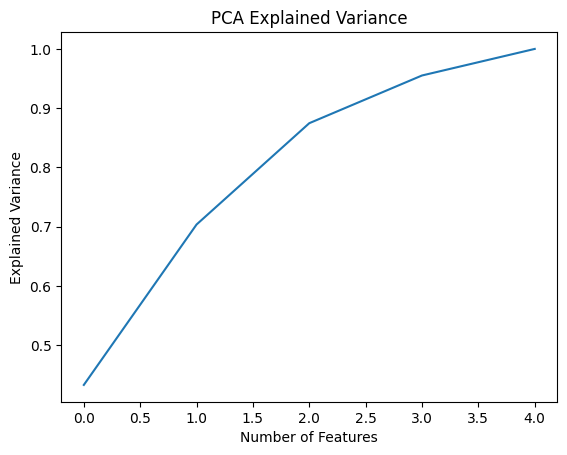

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=len(data.columns))
pca.fit(df_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [ ]:
# print out the features with high explained_variance

import numpy as np
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Set a threshold for explained variance (e.g., 95%)
threshold = 0.95

# Find the number of components needed to explain at least the threshold variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_threshold = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components explaining {threshold*100:.0f}% variance: {n_components_threshold}")


# Print features with high explained variance
high_variance_features = []
for i, variance in enumerate(explained_variance_ratio):
        high_variance_features.append((data.columns[i], variance))
        print(f"Feature '{data.columns[i]}': Explained variance ratio = {variance:.4f}")


Number of components explaining 95% variance: 4
Feature 'age_at_hire': Explained variance ratio = 0.4331
Feature 'tenure': Explained variance ratio = 0.2706
Feature 'median_salary': Explained variance ratio = 0.1710
Feature 'total_salary_increase': Explained variance ratio = 0.0805
Feature 'avg_percentage_increase': Explained variance ratio = 0.0448


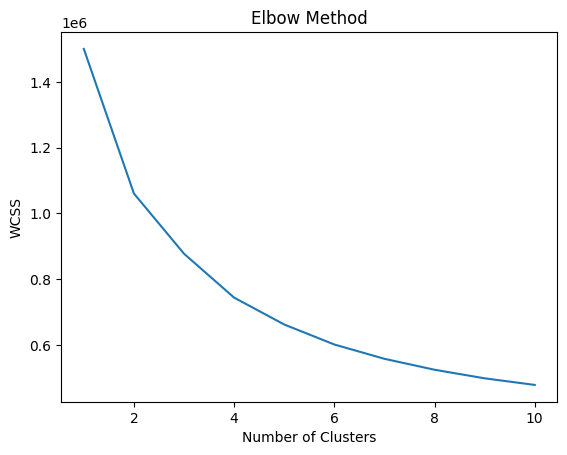

In [ ]:
from sklearn.cluster import KMeans


# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled) # Replace 'X' with your feature matrix
    wcss.append(kmeans.inertia_)   #using inertia

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Define the model with k=4
kmeans = KMeans(n_clusters=4 , init='k-means++')

# Fit the model on your scaled data
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Show cluster assignments
df_scaled["Cluster"].value_counts()

,count
Cluster,
0,99824
3,81098
1,65557
2,53523


In [ ]:
# Convert cluster centers back to a DataFrame
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns[:-1])  # Exclude 'Cluster' column

# Print the centers to understand each cluster
cluster_centers

,age_at_hire,tenure,median_salary,total_salary_increase,avg_percentage_increase
0,-0.643657,0.741016,-0.333046,0.617368,0.496394
1,-0.285760,0.531496,1.382575,0.525807,-0.537633
2,0.437233,-1.088002,-0.119038,-1.201824,-1.294763
3,0.737545,-0.626047,-0.630694,-0.393225,0.680198


In [ ]:
# get the clusters centers back to orginal data befrore scaling

# Inverse transform the cluster centers
original_centers = scaler.inverse_transform(cluster_centers)

# Create a DataFrame for the original cluster centers
original_cluster_centers = pd.DataFrame(original_centers, columns=data.columns)

# Print or use the original_cluster_centers
original_cluster_centers


,age_at_hire,tenure,median_salary,total_salary_increase,avg_percentage_increase
0,28.204847,15.555772,56341.931525,23335.693615,3.490937
1,30.046997,14.630052,82661.123553,22389.870660,2.299594
2,33.768354,7.474635,59625.008735,4543.366699,1.427276
3,35.314110,9.515687,51775.738097,12896.235012,3.702704


to revise again:

Cluster 0 – Long-Tenure Moderate Earners
(Employees who stay longer and experience steady salary growth)

Cluster 1 – Short-Tenure Low Growth
(Employees with shorter stays and minimal salary growth)

Cluster 2 – High Earners with Stability
(Employees with good salaries and long-term stability)

Cluster 3 – Mid-Career Rapid Growers
(Employees who start later but experience good salary growth)

***visualization:***

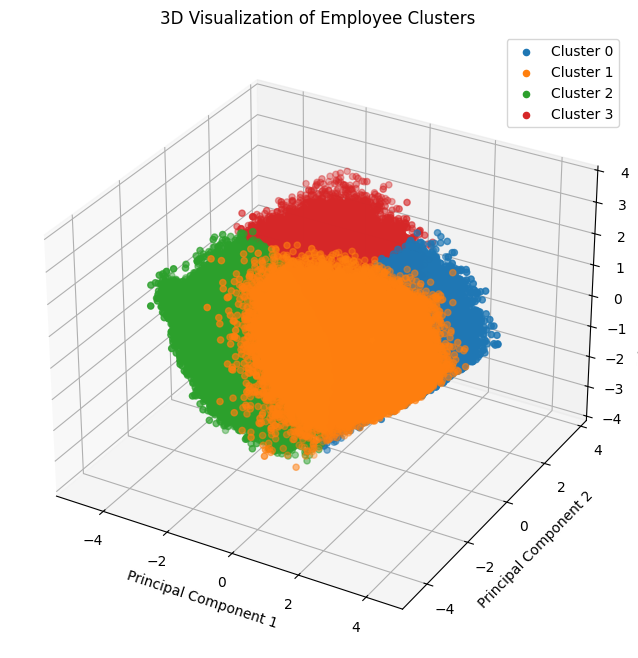

In [ ]:
# visualization clustering results in 3d using pca

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Reduce dimensions to 3 using PCA
pca_3d = PCA(n_components=3)
df_3d = pca_3d.fit_transform(df_scaled.drop('Cluster', axis=1))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(4):
    ax.scatter(df_3d[df_scaled['Cluster'] == cluster, 0],
               df_3d[df_scaled['Cluster'] == cluster, 1],
               df_3d[df_scaled['Cluster'] == cluster, 2],
               label=f'Cluster {cluster}')

# Customize the plot
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Employee Clusters')
ax.legend()

plt.show()


In [ ]:
# asign labels to clusters.

def assign_cluster_labels(cluster_num):
    if cluster_num == 0:
        return "Long-Tenure Moderate Earners"
    elif cluster_num == 1:
        return "Short-Tenure Low Growth"
    elif cluster_num == 2:
        return "High Earners with Stability"
    elif cluster_num == 3:
        return "Mid-Career Rapid Growers"
    else:
      return "Unknown"


df_scaled['Cluster_Label'] = df_scaled['Cluster'].apply(assign_cluster_labels)
df_scaled.drop('Cluster', axis=1, inplace=True)
df_scaled.head()

,age_at_hire,tenure,median_salary,total_salary_increase,avg_percentage_increase,Cluster_Label
0,0.256019,1.092694,0.947978,1.150309,-0.489303,Short-Tenure Low Growth
1,-1.949215,1.227253,0.456221,-0.993148,-1.111732,Short-Tenure Low Growth
2,-0.925642,1.053629,-1.171584,-1.321705,-1.500810,High Earners with Stability
3,0.211839,0.994721,-0.322123,1.650017,0.883167,Long-Tenure Moderate Earners
4,0.611581,0.364712,1.734698,-0.047847,-1.237046,Short-Tenure Low Growth


# ***apply time-series clustering for merged_df for salary progress:***

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843869 entries, 0 to 2843868
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   employee_id          int64         
 1   amount               int64         
 2   salary_sd            datetime64[ns]
 3   salary_ed            datetime64[ns]
 4   birth_date           object        
 5   gender               int64         
 6   hire_date            object        
 7   salary_duration      float64       
 8   salary_increase      float64       
 9   percentage_increase  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 217.0+ MB


# ***2- job title - promotion or career progress***

Use Case: Identify clusters of employees who have had rapid career progression.

In [ ]:
print(df_title['title'].unique())
df_title['title'].value_counts()

['Senior Engineer' 'Staff' 'Engineer' 'Senior Staff' 'Assistant Engineer'
 'Technique Leader' 'Manager']


,count
title,
Engineer,115003
Staff,107391
Senior Engineer,97750
Senior Staff,92853
Technique Leader,15159
Assistant Engineer,15128
Manager,24


In [ ]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   employee_id  443308 non-null  int64         
 1   title        443308 non-null  object        
 2   from_date    443308 non-null  datetime64[ns]
 3   to_date      203184 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 13.5+ MB


In [ ]:
# get job title records for employss with more than one job title

# Group by employee number and count the number of job titles
job_title_counts = df_title.groupby('employee_id')['title'].count()

# Filter for employees with more than one job title
employees_multiple_titles = job_title_counts[job_title_counts > 1]

# Extract job records of employees with career progression
multiple_job_titles_df = df_title[df_title['employee_id'].isin(employees_multiple_titles.index)]

print(len(job_title_counts))
print(len(employees_multiple_titles))
print(multiple_job_titles_df)


300024
140270
        employee_id            title  from_date    to_date
3             10004         Engineer 1986-12-01 1995-12-01
4             10004  Senior Engineer 1995-12-01        NaT
5             10005     Senior Staff 1996-09-12        NaT
6             10005            Staff 1989-09-12 1996-09-12
8             10007     Senior Staff 1996-02-11        NaT
...             ...              ...        ...        ...
443302       499996  Senior Engineer 2002-05-13        NaT
443303       499997         Engineer 1987-08-30 1992-08-29
443304       499997  Senior Engineer 1992-08-29        NaT
443305       499998     Senior Staff 1998-12-27        NaT
443306       499998            Staff 1993-12-27 1998-12-27

[283554 rows x 4 columns]


prepare data:

In [ ]:
# Get the first and last job title per employee
# Ensure 'to_date' is in datetime format

df_title["from_date"] = pd.to_datetime(df_title["from_date"], errors='coerce')
df_title["to_date"] = pd.to_datetime(df_title["to_date"], errors='coerce')
max_date = new_max_date
# Step 2: Replace NaT in salary_ed with max_date
df_title['to_date'].fillna(max_date, inplace=True)

max_date

<ipython-input-53-c97b8913897a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_title['to_date'].fillna(max_date, inplace=True)


Timestamp('2003-08-01 00:00:00')

In [ ]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   employee_id  443308 non-null  int64         
 1   title        443308 non-null  object        
 2   from_date    443308 non-null  datetime64[ns]
 3   to_date      443308 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 13.5+ MB


In [ ]:
# check if  there id records with from_date = to_date

# Check for records where from_date equals to_date in df_title
same_date_records = df_title[df_title['from_date'] == df_title['to_date']]

if not same_date_records.empty:
    print("Records with from_date equal to to_date found in df_salary:")
    print(same_date_records)
else:
    print("No records found where from_date equals to_date in df_salary.")


Records with from_date equal to to_date found in df_salary:
        employee_id            title  from_date    to_date
4534          13058     Senior Staff 2001-07-05 2001-07-05
6700          14539         Engineer 1998-12-17 1998-12-17
16381         21086         Engineer 1999-11-26 1999-11-26
47036         41818         Engineer 1999-06-07 1999-06-07
51948         45136  Senior Engineer 2001-07-24 2001-07-24
54911         47141            Staff 1989-01-16 1989-01-16
57560         48909     Senior Staff 1994-08-26 1994-08-26
104917        80863  Senior Engineer 1994-01-07 1994-01-07
123482        93361         Engineer 1994-09-19 1994-09-19
125705        94870  Senior Engineer 2001-09-03 2001-09-03
125845        94968         Engineer 1996-09-18 1996-09-18
135362       101368     Senior Staff 2002-02-25 2002-02-25
140578       104891         Engineer 1996-03-25 1996-03-25
152061       202618            Staff 1996-12-05 1996-12-05
180685       222006  Senior Engineer 1990-10-13 1990-10

In [ ]:

# Drop records where 'from_date' equals 'to_date'
df_title = df_title[df_title['from_date'] != df_title['to_date']]
len(df_title)

443277

In [ ]:
# Step 1: Calculate duration for each job title
df_title['duration_years'] = np.ceil((df_title['to_date'] - df_title['from_date']).dt.days / 365)
df_title.sort_values(by=['employee_id', 'from_date'], inplace=True)

# Step 2: Compute career progression data
career_progression = df_title.groupby('employee_id').agg(
    first_title=('title', 'first'),
    last_title=('title', 'last'),
    avg_job_duration=('duration_years', 'mean'),
    job_title_count=('title', 'count'),
    career_path=('title', lambda x: list(x))  # Create list of job titles
).reset_index()

career_progression.head()

,employee_id,first_title,last_title,avg_job_duration,job_title_count,career_path
0,10001,Senior Engineer,Senior Engineer,18.0,1,[Senior Engineer]
1,10002,Staff,Staff,7.0,1,[Staff]
2,10003,Senior Engineer,Senior Engineer,8.0,1,[Senior Engineer]
3,10004,Engineer,Senior Engineer,9.0,2,"[Engineer, Senior Engineer]"
4,10005,Staff,Senior Staff,7.5,2,"[Staff, Senior Staff]"


In [ ]:
len(career_progression)

300002

In [ ]:
career_progression.head(30)

,employee_id,first_title,last_title,avg_job_duration,job_title_count,career_path
0,10001,Senior Engineer,Senior Engineer,18.0,1,[Senior Engineer]
1,10002,Staff,Staff,7.0,1,[Staff]
2,10003,Senior Engineer,Senior Engineer,8.0,1,[Senior Engineer]
3,10004,Engineer,Senior Engineer,9.0,2,"[Engineer, Senior Engineer]"
4,10005,Staff,Senior Staff,7.5,2,"[Staff, Senior Staff]"
5,10006,Senior Engineer,Senior Engineer,13.0,1,[Senior Engineer]
6,10007,Staff,Senior Staff,8.0,2,"[Staff, Senior Staff]"
7,10008,Assistant Engineer,Assistant Engineer,3.0,1,[Assistant Engineer]
8,10009,Assistant Engineer,Senior Engineer,7.0,3,"[Assistant Engineer, Engineer, Senior Engineer]"
9,10010,Engineer,Engineer,7.0,1,[Engineer]


In [ ]:

# Check if all employees with job_title_count == 3 have first_title as 'Assistant Engineer' and last_title as 'Senior Engineer'
condition = (career_progression['job_title_count'] == 3) & \
            (career_progression['first_title'] == 'Assistant Engineer') & \
            (career_progression['last_title'] == 'Senior Engineer')

if condition.all():
    print("yes")
    count = len(career_progression[condition])
    print("Count of records matching the criteria:", count)
else:
    print("no")
    # Display records that have a count of 3 but do not match the title conditions
    mismatched_records = career_progression[(career_progression['job_title_count'] == 3) & ~condition]
mismatched_records


no


,employee_id,first_title,last_title,avg_job_duration,job_title_count,career_path
99998,110344,Senior Engineer,Technique Leader,6.333333,3,"[Senior Engineer, Manager, Technique Leader]"
99999,110386,Technique Leader,Technique Leader,5.333333,3,"[Technique Leader, Manager, Technique Leader]"
100004,110765,Technique Leader,Technique Leader,5.333333,3,"[Technique Leader, Manager, Technique Leader]"
100005,110800,Senior Engineer,Technique Leader,6.333333,3,"[Senior Engineer, Manager, Technique Leader]"
100012,111784,Senior Staff,Staff,5.333333,3,"[Senior Staff, Manager, Staff]"
100013,111877,Senior Staff,Staff,4.666667,3,"[Senior Staff, Manager, Staff]"


In [ ]:
# get recods of employees on title table with id = 10009

# Display records from the 'title' table where 'employee_number' is 10009
print(df_title[df_title['employee_id'] == 110800])


        employee_id             title  from_date    to_date  duration_years
148167       110800   Senior Engineer 1986-08-12 1991-09-12             6.0
148166       110800           Manager 1991-09-12 1994-06-28             3.0
148168       110800  Technique Leader 1994-06-28 2003-08-01            10.0


In [ ]:
career_progression['career_path'].value_counts()


,count
career_path,
"[Staff, Senior Staff]",66256
"[Engineer, Senior Engineer]",64689
[Staff],41121
[Engineer],41010
[Senior Engineer],30045
[Senior Staff],26581
[Technique Leader],15148
"[Assistant Engineer, Engineer]",6286
[Assistant Engineer],5835


In [ ]:
career_progression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   employee_id       300002 non-null  int64  
 1   first_title       300002 non-null  object 
 2   last_title        300002 non-null  object 
 3   avg_job_duration  300002 non-null  float64
 4   job_title_count   300002 non-null  int64  
 5   career_path       300002 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 13.7+ MB


In [ ]:
job_title_hierarchy = {
    'Manager': 1,
    'Technique Leader': 2,
    'Senior Staff': 3,
    'Senior Engineer': 4,
    'Staff': 5,
    'Engineer': 6,
    'Assistant Engineer': 7
}
job_title_hierarchy_updated = {  #to try1
    'Manager': 1,
    'Technique Leader': 2,
    'Senior Engineer': 3,
    'Engineer': 4,
    'Assistant Engineer': 5,
    'Senior Staff': 6,
    'Staff': 7
}

In [ ]:

# Map job titles in career_path to their numeric values
career_progression['career_path_seq'] = career_progression['career_path'].apply(
    lambda x: [job_title_hierarchy[title] for title in x]
)

# Map job titles to numeric values
career_progression['first_title_numeric'] = career_progression['first_title'].map(job_title_hierarchy)
career_progression['last_title_numeric'] = career_progression['last_title'].map(job_title_hierarchy)
career_progression.head(30)

,employee_id,first_title,last_title,avg_job_duration,job_title_count,career_path,career_path_seq,first_title_numeric,last_title_numeric
0,10001,Senior Engineer,Senior Engineer,18.0,1,[Senior Engineer],[4],4,4
1,10002,Staff,Staff,7.0,1,[Staff],[5],5,5
2,10003,Senior Engineer,Senior Engineer,8.0,1,[Senior Engineer],[4],4,4
3,10004,Engineer,Senior Engineer,9.0,2,"[Engineer, Senior Engineer]","[6, 4]",6,4
4,10005,Staff,Senior Staff,7.5,2,"[Staff, Senior Staff]","[5, 3]",5,3
5,10006,Senior Engineer,Senior Engineer,13.0,1,[Senior Engineer],[4],4,4
6,10007,Staff,Senior Staff,8.0,2,"[Staff, Senior Staff]","[5, 3]",5,3
7,10008,Assistant Engineer,Assistant Engineer,3.0,1,[Assistant Engineer],[7],7,7
8,10009,Assistant Engineer,Senior Engineer,7.0,3,"[Assistant Engineer, Engineer, Senior Engineer]","[7, 6, 4]",7,4
9,10010,Engineer,Engineer,7.0,1,[Engineer],[6],6,6


In [ ]:
career_progression['terminated'] = career_progression['employee_id'].isin(latest_terminated_df['employee_id']).map({True: 'Terminated', False: 'Active'})
career_progression['terminated'].value_counts()

,count
terminated,
Active,240124
Terminated,59878


***we have two datasets after feature engineering:***

In [ ]:
print(career_progression.info())
print("------------------------------------------------------------------")
print(career_progression.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   employee_id          300002 non-null  int64  
 1   first_title          300002 non-null  object 
 2   last_title           300002 non-null  object 
 3   avg_job_duration     300002 non-null  float64
 4   job_title_count      300002 non-null  int64  
 5   career_path          300002 non-null  object 
 6   career_path_seq      300002 non-null  object 
 7   first_title_numeric  300002 non-null  int64  
 8   last_title_numeric   300002 non-null  int64  
 9   terminated           300002 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 22.9+ MB
None
------------------------------------------------------------------
         employee_id  avg_job_duration  job_title_count  first_title_numeric  \
count  300002.000000     300002.000000    300002.000000       

# ***feature selection & categorical transformation.***

Career Progression Features:

1.   first_title, last_title → Helps in career path clustering.
2.   avg_job_duration → Indicates job stability and career growth.
3.   job_title_count → Shows how often employees change roles.
4.career_path → Tracks career transitions.




Career Path Optimization:

Identify typical career trajectories within the company.
Help employees follow successful career paths.

Promotion Readiness:

Detect employees who are likely ready for promotion.
Compare employees’ progression with others in their cluster.

Job Stability & Retention Risk:

Find employees with high job switching rates (possible turnover risk).
Identify patterns in employees who have left the company.

Predictive HR Insights:

Recognize career paths associated with high performance.
Detect stagnation or anomalies in career progression.

***"The goal is to analyze and cluster employees based on their career progression, job title transitions, and employment duration to identify patterns in career paths. This can help HR teams with workforce planning, retention strategies, and predicting employee churn."***

# **DATA CLEANING:**

In [ ]:
career_progression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   employee_id          300002 non-null  int64  
 1   first_title          300002 non-null  object 
 2   last_title           300002 non-null  object 
 3   avg_job_duration     300002 non-null  float64
 4   job_title_count      300002 non-null  int64  
 5   career_path          300002 non-null  object 
 6   career_path_seq      300002 non-null  object 
 7   first_title_numeric  300002 non-null  int64  
 8   last_title_numeric   300002 non-null  int64  
 9   terminated           300002 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 22.9+ MB


In [ ]:
"""from sklearn.preprocessing import LabelEncoder

le_first = LabelEncoder()
le_last = LabelEncoder()
le_path = LabelEncoder()

career_df = career_progression.copy()

career_df['first_title_encoded'] = le_first.fit_transform(career_df['first_title'])
career_df['last_title_encoded'] = le_last.fit_transform(career_df['last_title'])

first_title_mapping = dict(zip(le_first.classes_, le_first.transform(le_first.classes_)))
last_title_mapping = dict(zip(le_last.classes_, le_last.transform(le_last.classes_)))

print("First Title Mapping:", first_title_mapping)
print("Last Title Mapping:", last_title_mapping)"""
#LabelEncoder not desciptive.


First Title Mapping: {'Assistant Engineer': 0, 'Engineer': 1, 'Manager': 2, 'Senior Engineer': 3, 'Senior Staff': 4, 'Staff': 5, 'Technique Leader': 6}
Last Title Mapping: {'Assistant Engineer': 0, 'Engineer': 1, 'Manager': 2, 'Senior Engineer': 3, 'Senior Staff': 4, 'Staff': 5, 'Technique Leader': 6}


In [ ]:

career_progression['status'] = career_progression['terminated'].map({'Terminated': 0, 'Active': 1})
career_progression = career_progression.drop('terminated', axis=1)


In [ ]:
"""from gensim.models import Word2Vec
# Train Word2Vec Model
career_paths = career_progression['career_path'].tolist()


# Train Word2Vec Model
w2v_model = Word2Vec(sentences=career_paths,
                     vector_size=10,  # Dimensionality of word vectors
                     window=2,  # Context window size
                     min_count=1,  # Minimum word frequency
                     workers=4)  # Use 4 CPU threads
"""


In [ ]:
#w2v_model.save("career_path_w2v.model")

In [ ]:
# Get vector for "Manager"
"""manager_vector = w2v_model.wv["Manager"]
print(manager_vector)
# Get vector representation of 'Engineer'
vector_engineer = w2v_model.wv['Engineer']
print(vector_engineer)
"""


[-0.04587099  0.01764031  0.13821265 -0.0140104  -0.14511627 -0.12048633
  0.18783517  0.1214129  -0.18152279 -0.14554515]
[-0.44985595  0.17368495  1.0362185   1.3450117  -1.3143251  -1.2301319
  1.0376066   1.5012022  -0.5947799  -0.15702091]


In [ ]:
# Find jobs similar to "Manager"
"""similar_jobs = w2v_model.wv.most_similar("Staff", topn=5)
print(similar_jobs)"""


[('Manager', 0.4023193120956421), ('Technique Leader', 0.20268318057060242), ('Engineer', 0.17694160342216492), ('Senior Engineer', 0.149248406291008), ('Senior Staff', 0.12962542474269867)]


In [ ]:
# Function to get average vector for a career path
"""
def get_career_vector(career_path_tokens):
    vectors = [w2v_model.wv[job] for job in career_path_tokens if job in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(10)  # If no jobs exist, return zero vector

# Apply transformation
career_progression['career_path_vector'] = career_progression['career_path'].apply(get_career_vector)
"""

In [ ]:
#career_progression["career_path_vector"][0]

array([ 0.94826746,  0.9995944 ,  1.2006354 ,  0.1191434 ,  1.2563473 ,
       -0.80838007,  0.15676117,  0.7490256 , -1.5034006 , -0.55879384],
      dtype=float32)

In [ ]:
#career_progression[['career_path','career_path_seq','career_path_vector']]

,career_path,career_path_seq,career_path_vector
0,[Senior Engineer],[4],"[0.94826746, 0.9995944, 1.2006354, 0.1191434, ..."
1,[Staff],[5],"[1.4324203, -0.5699355, -1.0637814, 0.8586745,..."
2,[Senior Engineer],[4],"[0.94826746, 0.9995944, 1.2006354, 0.1191434, ..."
3,"[Engineer, Senior Engineer]","[6, 4]","[0.24920575, 0.58663964, 1.118427, 0.73207754,..."
4,"[Staff, Senior Staff]","[5, 3]","[0.24761716, -0.3807806, 0.3897534, -0.2457578..."
...,...,...,...
299997,[Engineer],[6],"[-0.44985595, 0.17368495, 1.0362185, 1.3450117..."
299998,"[Engineer, Senior Engineer]","[6, 4]","[0.24920575, 0.58663964, 1.118427, 0.73207754,..."
299999,"[Engineer, Senior Engineer]","[6, 4]","[0.24920575, 0.58663964, 1.118427, 0.73207754,..."
300000,"[Staff, Senior Staff]","[5, 3]","[0.24761716, -0.3807806, 0.3897534, -0.2457578..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
"""def get_vector(title):
    return w2v_model.wv[title] if title in w2v_model.wv else np.zeros(10)

career_progression['first_title_vector'] = career_progression['first_title'].apply(get_vector)
career_progression['last_title_vector'] = career_progression['last_title'].apply(get_vector)"""

In [ ]:
# Convert vector columns from string to actual numpy arrays
"""import ast  # To safely convert string representations of lists to lists

vector_cols = ['career_path_vector', 'first_title_vector', 'last_title_vector']

for col in vector_cols:
    df_job[col] = df_job[col].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x)

# Expand vectors into separate columns
for col in vector_cols:
    vectors = np.stack(df_job[col].values)  # Convert list of arrays into a 2D NumPy array
    vector_df = pd.DataFrame(vectors, columns=[f"{col}_{i}" for i in range(10)])
    df_job = pd.concat([df_job, vector_df], axis=1)

# Drop original vector columns
df_job.drop(columns=vector_cols, inplace=True)

# Check new dataset structure
print(df_job.info())
print("--------------------------------------------------")
print(df_job.head())"""


'import ast  # To safely convert string representations of lists to lists\n\nvector_cols = [\'career_path_vector\', \'first_title_vector\', \'last_title_vector\']\n\nfor col in vector_cols:\n    df_job[col] = df_job[col].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x)\n\n# Expand vectors into separate columns\nfor col in vector_cols:\n    vectors = np.stack(df_job[col].values)  # Convert list of arrays into a 2D NumPy array\n    vector_df = pd.DataFrame(vectors, columns=[f"{col}_{i}" for i in range(10)])\n    df_job = pd.concat([df_job, vector_df], axis=1)\n\n# Drop original vector columns\ndf_job.drop(columns=vector_cols, inplace=True)\n\n# Check new dataset structure\nprint(df_job.info())\nprint("--------------------------------------------------")\nprint(df_job.head())'

In [ ]:
# Drop highly correlated features
"""corr_threshold = 0.8
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col_name = corr_matrix.columns[i]
            correlated_features.add(col_name)

df_job.drop(columns=correlated_features, inplace=True)

print("Remaining Features After Correlation Filtering:", df_job.columns)
"""

Remaining Features After Correlation Filtering: Index(['avg_job_duration', 'job_title_count', 'first_title_numeric',
       'last_title_numeric', 'status', 'career_path_vector_0',
       'career_path_vector_1', 'career_path_vector_2', 'career_path_vector_3',
       'career_path_vector_4', 'career_path_vector_5', 'career_path_vector_6',
       'first_title_vector_0', 'first_title_vector_4', 'first_title_vector_6',
       'last_title_vector_0', 'last_title_vector_2'],
      dtype='object')


In [ ]:
career_progression

,employee_id,first_title,last_title,avg_job_duration,job_title_count,career_path,career_path_seq,first_title_numeric,last_title_numeric,status
0,10001,Senior Engineer,Senior Engineer,18.0,1,[Senior Engineer],[4],4,4,1
1,10002,Staff,Staff,7.0,1,[Staff],[5],5,5,1
2,10003,Senior Engineer,Senior Engineer,8.0,1,[Senior Engineer],[4],4,4,1
3,10004,Engineer,Senior Engineer,9.0,2,"[Engineer, Senior Engineer]","[6, 4]",6,4,1
4,10005,Staff,Senior Staff,7.5,2,"[Staff, Senior Staff]","[5, 3]",5,3,1
...,...,...,...,...,...,...,...,...,...,...
299997,499995,Engineer,Engineer,7.0,1,[Engineer],[6],6,6,1
299998,499996,Engineer,Senior Engineer,4.5,2,"[Engineer, Senior Engineer]","[6, 4]",6,4,1
299999,499997,Engineer,Senior Engineer,8.5,2,"[Engineer, Senior Engineer]","[6, 4]",6,4,1
300000,499998,Staff,Senior Staff,5.5,2,"[Staff, Senior Staff]","[5, 3]",5,3,1


In [ ]:
# get max lenth for career_path_seq and ad zeros if not equal lenght seq
# how to prepare it to be suitable form with other features for clustering


# Find the maximum length of career_path_seq
max_len = career_progression['career_path_seq'].apply(len).max()

# Function to pad sequences with zeros
def pad_sequences(seq, max_len):
    padding = [0] * (max_len - len(seq))
    return seq + padding

# Apply padding to career_path_seq
career_progression['career_path_seq_padded'] = career_progression['career_path_seq'].apply(lambda x: pad_sequences(x, max_len))
career_progression['career_path_seq_padded']


,career_path_seq_padded
0,"[4, 0, 0]"
1,"[5, 0, 0]"
2,"[4, 0, 0]"
3,"[6, 4, 0]"
4,"[5, 3, 0]"
...,...
299997,"[6, 0, 0]"
299998,"[6, 4, 0]"
299999,"[6, 4, 0]"
300000,"[5, 3, 0]"


In [ ]:

# Convert the padded list to separate columns
padded_df = pd.DataFrame(career_progression['career_path_seq_padded'].to_list(), columns=[f'job_title_{i}' for i in range(max_len)])
career_progression = pd.concat([career_progression, padded_df], axis=1)

career_progression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   employee_id             300002 non-null  int64  
 1   first_title             300002 non-null  object 
 2   last_title              300002 non-null  object 
 3   avg_job_duration        300002 non-null  float64
 4   job_title_count         300002 non-null  int64  
 5   career_path             300002 non-null  object 
 6   career_path_seq         300002 non-null  object 
 7   first_title_numeric     300002 non-null  int64  
 8   last_title_numeric      300002 non-null  int64  
 9   status                  300002 non-null  int64  
 10  career_path_seq_padded  300002 non-null  object 
 11  job_title_0             300002 non-null  int64  
 12  job_title_1             300002 non-null  int64  
 13  job_title_2             300002 non-null  int64  
dtypes: float64(1), int64

In [ ]:
# get numeric columns names

numeric_cols = career_progression.select_dtypes(include=np.number).columns
numeric_cols


Index(['employee_id', 'avg_job_duration', 'job_title_count',
       'first_title_numeric', 'last_title_numeric', 'status', 'job_title_0',
       'job_title_1', 'job_title_2'],
      dtype='object')

In [ ]:
cluster_data = career_progression[numeric_cols]


In [ ]:
cluster_data

,employee_id,avg_job_duration,job_title_count,first_title_numeric,last_title_numeric,status,job_title_0,job_title_1,job_title_2
0,10001,18.0,1,4,4,1,4,0,0
1,10002,7.0,1,5,5,1,5,0,0
2,10003,8.0,1,4,4,1,4,0,0
3,10004,9.0,2,6,4,1,6,4,0
4,10005,7.5,2,5,3,1,5,3,0
...,...,...,...,...,...,...,...,...,...
299997,499995,7.0,1,6,6,1,6,0,0
299998,499996,4.5,2,6,4,1,6,4,0
299999,499997,8.5,2,6,4,1,6,4,0
300000,499998,5.5,2,5,3,1,5,3,0


In [ ]:
career_progression['status'].value_counts()

,count
status,
1,240124
0,59878


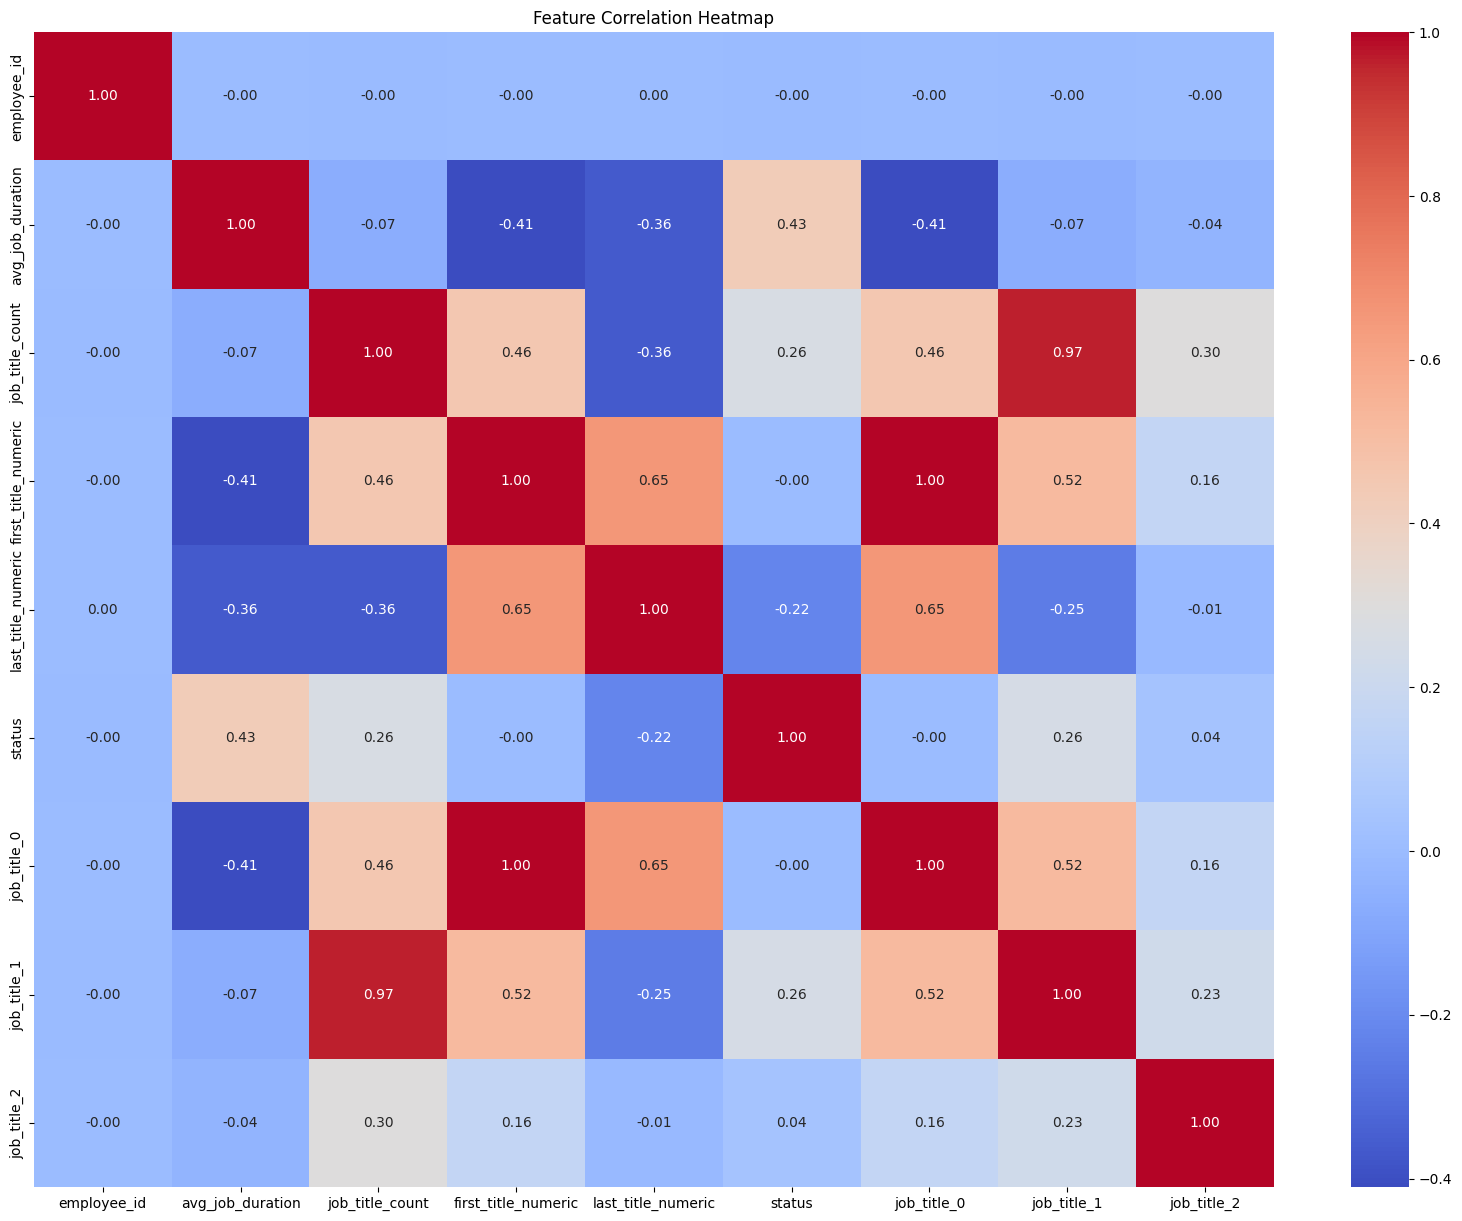

In [ ]:
# Compute correlation matrix
corr_matrix = cluster_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [ ]:
# drop correlated columns first_title_numeric , last_title_numeric, employeeid,job_title_count

# Drop the specified columns
cluster_data.drop(columns=['first_title_numeric', 'last_title_numeric', 'employee_id', 'job_title_count'], inplace=True)


<ipython-input-174-abe218cc1372>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.drop(columns=['first_title_numeric', 'last_title_numeric', 'employee_id', 'job_title_count'], inplace=True)


In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   avg_job_duration  300002 non-null  float64
 1   status            300002 non-null  int64  
 2   job_title_0       300002 non-null  int64  
 3   job_title_1       300002 non-null  int64  
 4   job_title_2       300002 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 11.4 MB


In [ ]:
cluster_data.describe()

,avg_job_duration,status,job_title_0,job_title_1,job_title_2
count,300002.000000,300002.000000,300002.00000,300002.000000,300002.000000
mean,7.357097,0.800408,5.02413,1.711085,0.040153
std,3.442438,0.399694,1.20961,1.904090,0.398724
min,1.000000,0.000000,1.00000,0.000000,0.000000
25%,5.000000,1.000000,5.00000,0.000000,0.000000
50%,7.000000,1.000000,5.00000,0.000000,0.000000
75%,9.000000,1.000000,6.00000,3.000000,0.000000
max,19.000000,1.000000,7.00000,6.000000,5.000000


In [ ]:
binary_cols = ['status']  # Replace with actual binary column names if multiple
numeric_cols = [col for col in cluster_data.columns if col not in binary_cols]

scaler_j = StandardScaler()
df_scaled_numeric = scaler_j.fit_transform(cluster_data[numeric_cols])
df_scaled_job = pd.DataFrame(df_scaled_numeric, columns=numeric_cols)

#df_scaled_job = pd.concat([df_scaled_numeric, cluster_data[binary_cols].reset_index(drop=True)], axis=1)

df_scaled_job.describe().T



,count,mean,std,min,25%,50%,75%,max
avg_job_duration,300002.0,-6.875639e-17,1.000002,-1.846688,-0.684718,-0.103734,0.477251,3.382173
job_title_0,300002.0,-2.557937e-17,1.000002,-3.326805,-0.019948,-0.019948,0.806766,1.633480
job_title_1,300002.0,-9.758055e-18,1.000002,-0.898638,-0.898638,-0.898638,0.676920,2.252478
job_title_2,300002.0,-6.667215e-18,1.000002,-0.100704,-0.100704,-0.100704,-0.100704,12.439331


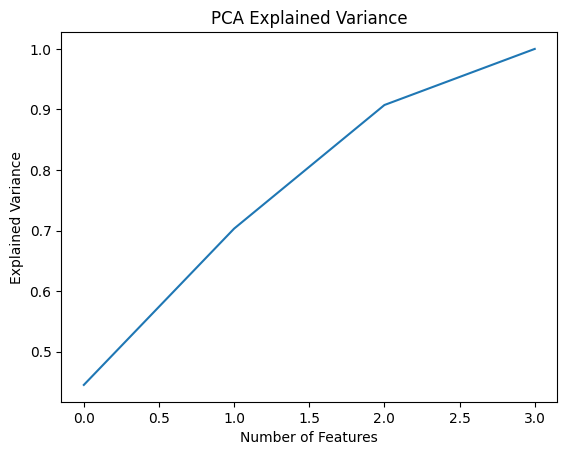

In [ ]:

pca = PCA(n_components=len(df_scaled_job.columns))
pca.fit(df_scaled_job)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [ ]:
print(pca.n_components_)
print(pca.explained_variance_ratio_)
#get all pcas and corrrelation between them.

4
[0.44529677 0.2580607  0.20405801 0.09258452]


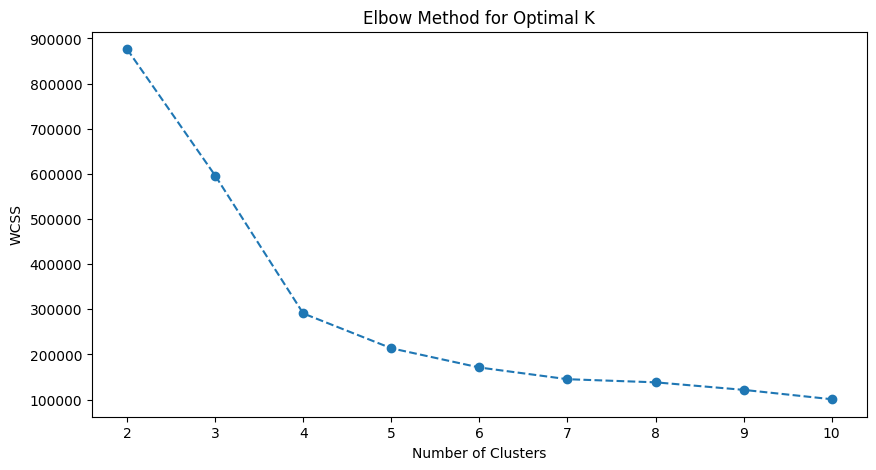

In [ ]:
wcss = []

for k in range(2, 11):  # Trying different k values (use hiraical clustering to see distribution of data)
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled_job)

    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    #silhouette_scores.append(silhouette_score(df_scaled_job, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()



In [ ]:
# try k= 4,k=6
optimal_k1 = 4  # Assume elbow shows k=4
optimal_k2 = 5  # Assume elbow shows k=6

kmeans1 = KMeans(n_clusters=optimal_k1, init='k-means++')
kmeans2 = KMeans(n_clusters=optimal_k2, init='k-means++')

df1 = df_scaled_job.copy()
df2 = df_scaled_job.copy()
df1['cluster1'] = kmeans1.fit_predict(df_scaled_job)
df2['cluster2'] = kmeans2.fit_predict(df_scaled_job)


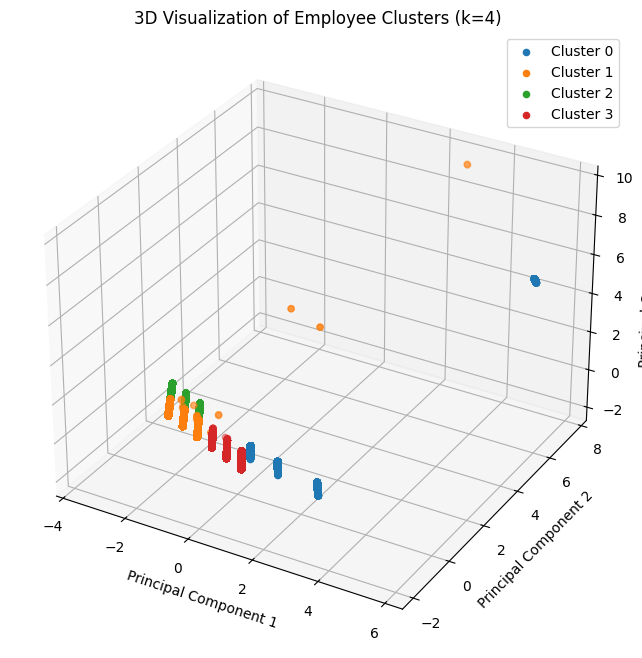

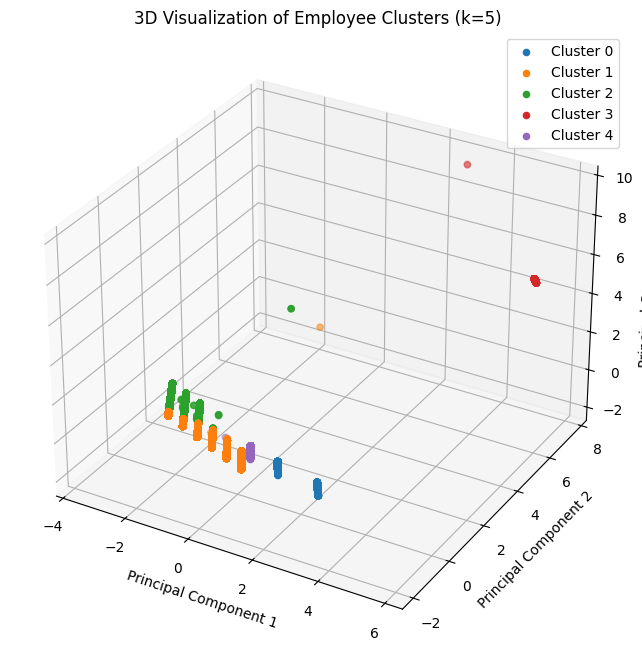

In [ ]:
# visualize two clustering results in different 3d plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Assuming df_scaled_job is your DataFrame with 'cluster1' and 'cluster2' columns

# Reduce dimensions to 3 using PCA
pca_3d = PCA(n_components=3)
df_3d = pca_3d.fit_transform(df_scaled_job)

# Create the first 3D plot for 'cluster1'
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

for cluster in range(optimal_k1):
    ax1.scatter(df_3d[df1['cluster1'] == cluster, 0],
                df_3d[df1['cluster1'] == cluster, 1],
                df_3d[df1['cluster1'] == cluster, 2],
                label=f'Cluster {cluster}')

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.set_title('3D Visualization of Employee Clusters (k=4)')
ax1.legend()
plt.show()

# Create the second 3D plot for 'cluster2'
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')

for cluster in range(optimal_k2):
    ax2.scatter(df_3d[df2['cluster2'] == cluster, 0],
                df_3d[df2['cluster2'] == cluster, 1],
                df_3d[df2['cluster2'] == cluster, 2],
                label=f'Cluster {cluster}')

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.set_title('3D Visualization of Employee Clusters (k=5)')
ax2.legend()
plt.show()


In [ ]:
# get Silhouette Score for k =5 and k = 4 (Measures cohesion & separation. Higher is better.)
"""
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for k=4
silhouette_avg4 = silhouette_score(df_scaled_job, kmeans1.labels_)
print(f"Silhouette Score for k=4: {silhouette_avg4}")

# Calculate Silhouette Score for k=5
silhouette_avg5 = silhouette_score(df_scaled_job, kmeans2.labels_)
print(f"Silhouette Score for k=5: {silhouette_avg5}")"""


'\nfrom sklearn.metrics import silhouette_score\n\n# Calculate Silhouette Score for k=4\nsilhouette_avg4 = silhouette_score(df_scaled_job, kmeans1.labels_)\nprint(f"Silhouette Score for k=4: {silhouette_avg4}")\n\n# Calculate Silhouette Score for k=5\nsilhouette_avg5 = silhouette_score(df_scaled_job, kmeans2.labels_)\nprint(f"Silhouette Score for k=5: {silhouette_avg5}")'

In [ ]:
df1['cluster1'].value_counts()

,count
cluster1,
0,140238
3,87967
1,37411
2,34386


In [ ]:
print(kmeans1.cluster_centers_.shape)  # Should be (5, X)
print(df_scaled_job.columns)  # Check all column names


(4, 4)
Index(['avg_job_duration', 'job_title_0', 'job_title_1', 'job_title_2'], dtype='object')


In [ ]:
kmeans2.cluster_centers_

array([[-0.06677317,  0.87998478,  1.29513393, -0.10070417],
       [-0.63021456,  0.18454829, -0.89862343, -0.10060996],
       [ 1.43093675, -1.60821401, -0.89823412, -0.1005159 ],
       [-0.38611674,  1.63128187,  2.2507331 ,  9.93299123],
       [-0.04895617, -0.01994848,  0.67690428, -0.10070417]])

In [ ]:
# get centers and inverse their value of scaling

cluster_centers = pd.DataFrame(kmeans1.cluster_centers_, columns=df1.columns[:-1])  # Exclude 'Cluster' column

# Print the centers to understand each cluster
cluster_centers




,avg_job_duration,job_title_0,job_title_1,job_title_2
0,-0.065202,0.470964,1.023584,0.114404
1,-0.320077,-1.502823,-0.897992,-0.099497
2,2.124894,-1.501235,-0.898638,-0.100704
3,-0.590544,0.475138,-0.898632,-0.100704


In [ ]:
# get the clusters centers back to orginal data befrore scaling

# Inverse transform the cluster centers
original_centers = scaler_j.inverse_transform(cluster_centers)

# Create a DataFrame for the original cluster centers
original_cluster_centers = pd.DataFrame(original_centers, columns=df_scaled_job.columns)

# Print or use the original_cluster_centers
original_cluster_centers

"""job_title_hierarchy = {
    'Manager': 1,
    'Technique Leader': 2,
    'Senior Staff': 3,
    'Senior Engineer': 4,
    'Staff': 5,
    'Engineer': 6,
    'Assistant Engineer': 7
}"""


,avg_job_duration,job_title_0,job_title_1,job_title_2
0,7.132642,5.593812,3.660078e+00,8.576848e-02
1,6.255255,3.206303,1.229585e-03,4.811419e-04
2,14.671901,3.208224,8.528733e-13,-2.961520e-14
3,5.324190,5.598861,1.136790e-05,3.561734e-14


In [ ]:

# Add cluster labels to the original DataFrame (career_progression)
career_progression['cluster'] = df1['cluster1']

cluster_data0 = career_progression[career_progression['cluster'] == 0]
cluster_data1 = career_progression[career_progression['cluster'] == 1]
cluster_data2 = career_progression[career_progression['cluster'] == 2]
cluster_data3 = career_progression[career_progression['cluster'] == 3]



In [ ]:
career_progression['cluster']

,cluster
0,2
1,3
2,1
3,0
4,0
...,...
299997,3
299998,0
299999,0
300000,0


# ***try another algorithms***

In [ ]:
# use other clustering methods

from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # You can adjust the number of clusters
df_scaled_job['agg_cluster'] = agg_clustering.fit_predict(df_scaled_job.drop(['cluster1', 'cluster2'], axis=1))

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed
df_scaled_job['dbscan_cluster'] = dbscan.fit_predict(df_scaled_job.drop(['cluster1', 'cluster2', 'agg_cluster'], axis=1))


# Dendrogram for Agglomerative Clustering (optional visualization)
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled_job.drop(['cluster1', 'cluster2', 'agg_cluster', 'dbscan_cluster'], axis=1), method='ward')) #method='ward'
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Visualize Agglomerative Clustering Results (3D)
pca_3d = PCA(n_components=3)
df_3d = pca_3d.fit_transform(df_scaled_job.drop(['cluster1', 'cluster2', 'agg_cluster', 'dbscan_cluster'], axis=1))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in np.unique(df_scaled_job['agg_cluster']):
    ax.scatter(df_3d[df_scaled_job['agg_cluster'] == cluster, 0],
               df_3d[df_scaled_job['agg_cluster'] == cluster, 1],
               df_3d[df_scaled_job['agg_cluster'] == cluster, 2],
               label=f'Agglomerative Cluster {cluster}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Employee Clusters (Agglomerative)')
ax.legend()
plt.show()

# Calculate Silhouette Score for Agglomerative Clustering
silhouette_avg_agg = silhouette_score(df_scaled_job.drop(['cluster1', 'cluster2', 'agg_cluster', 'dbscan_cluster'], axis=1), df_scaled_job['agg_cluster'])
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg_agg}")

# Calculate Silhouette Score for DBSCAN (if applicable - ignore noisy samples)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

if n_clusters_ > 1: #Silhouette score is not defined for a single cluster
  silhouette_avg_dbscan = silhouette_score(df_scaled_job.drop(['cluster1', 'cluster2', 'agg_cluster', 'dbscan_cluster'], axis=1), dbscan.labels_)
  print(f"Silhouette Score for DBSCAN Clustering: {silhouette_avg_dbscan}")
else:
  print("DBSCAN Silhouette score cannot be computed for a single cluster")

df_scaled_job.head()


# ***Apply clustering: K-means, Hierarchical Agglomerative Clustering, DBSCAN, Mean shift***

***in need of DR: Principal Components Analysis, Non-negative Matrix, Factorizationv***

In [ ]:
#kmeans clustering:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
"""kmeans.fit(X)
labels = kmeans.labels_"""

'kmeans.fit(X)\nlabels = kmeans.labels_'

In [ ]:
"""km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)"""


'km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run\nkm = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)'

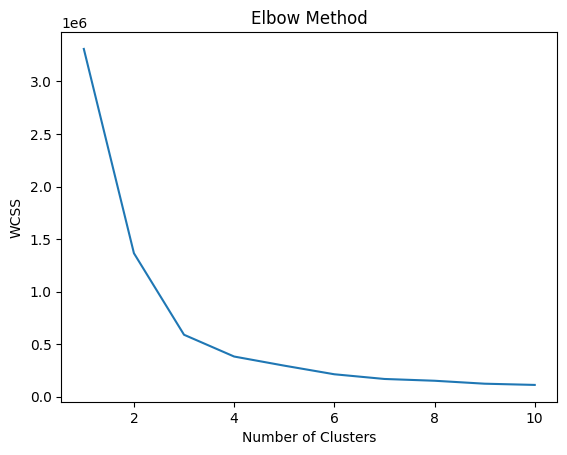

In [ ]:
# implement elbow method

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(career_progression[['avg_job_duration', 'job_title_count']]) # Replace 'X' with your feature matrix
    wcss.append(kmeans.inertia_)   #using inertia

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5 #making overlapping points more distinguishable
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
#  visalize  results of kmeans by display_cluster with k = 3

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'career_progression' DataFrame and 'num_clusters' variable are defined as in the original code.
# Example usage (replace with your actual data and num_clusters):
num_clusters = 3  # Example number of clusters

# Assuming career_progression[['avg_job_duration', 'job_title_count']] is your feature matrix (X).

X = career_progression[['avg_job_duration', 'job_title_count','status']].values

km = KMeans(n_clusters=num_clusters, init='k-means++')
km.fit(X)

# Call the display_cluster function to visualize results
#display_cluster(X, km, num_clusters)
plt.show()


In [ ]:
def display_cluster_3d(X, km=[], num_clusters=0, feature_labels=None):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    if num_clusters == 0:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            ax.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], X[km.labels_ == i, 2],
                       c=color[i % len(color)], alpha=alpha, s=s, label=f'Cluster {i+1}')
            ax.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], km.cluster_centers_[i][2],
                       c=color[i % len(color)], marker='x', s=100, label=f'Centroid {i+1}')

    # Set axis labels
    if feature_labels:
        ax.set_xlabel(feature_labels[0], fontsize=12)
        ax.set_ylabel(feature_labels[1], fontsize=12)
        ax.set_zlabel(feature_labels[2], fontsize=12)

    ax.set_title("3D Clustering Visualization", fontsize=14)
    ax.legend()
    plt.show()

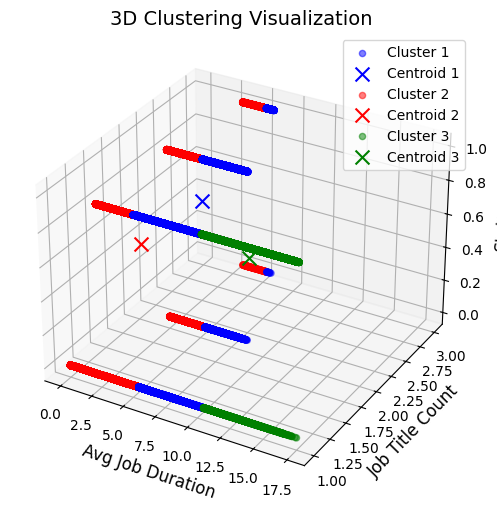

In [ ]:
display_cluster_3d(X, km, num_clusters, feature_labels=['Avg Job Duration', 'Job Title Count', 'Status'])


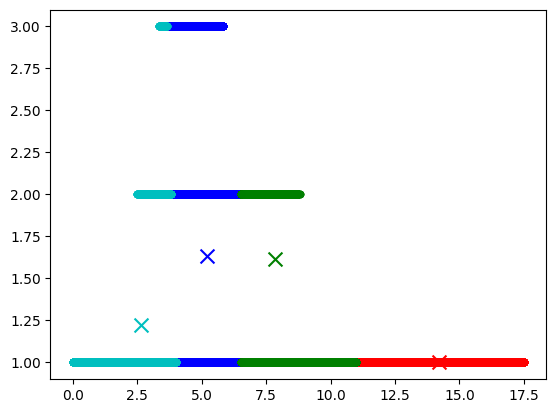

In [ ]:
# use k = 4 and use display_cluster to visualize clusters

num_clusters = 4 #Use k = 4

# Assuming career_progression[['avg_job_duration', 'job_title_count']] is your feature matrix (X).

X = career_progression[['avg_job_duration', 'job_title_count']].values

km = KMeans(n_clusters=num_clusters, init='k-means++')
km.fit(X)

# Call the display_cluster function to visualize results
display_cluster(X, km, num_clusters)
plt.show()



GMM: With GMM, not only will you be getting the predicted cluster labels, the algorithm will also give you the probability of a data point belonging to a cluster.

In [ ]:
# prompt: apply GMM clustering

from sklearn.mixture import GaussianMixture

# Assuming 'career_progression' DataFrame and features are as defined in the previous code

# Feature selection for GMM clustering
features = ['avg_job_duration', 'job_title_count',]
X = career_progression[features]

# Apply GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
gmm.fit(X)

# Get cluster labels and probabilities
labels = gmm.predict(X)
probabilities = gmm.predict_proba(X)

# Add cluster labels to the DataFrame
career_progression['gmm_cluster'] = labels

# Add cluster probabilities to the DataFrame
for i in range(3):  # Assuming 3 clusters, adjust if needed
    career_progression[f'gmm_cluster_{i}_prob'] = probabilities[:, i]


# Now you have the GMM cluster labels and probabilities in the 'career_progression' DataFrame.

# Example: Print the first few rows with the new columns
print(career_progression.head())


# Visualization (example using the first two features)
import matplotlib.pyplot as plt

plt.scatter(career_progression['avg_job_duration'], career_progression['job_title_count'], c=career_progression['gmm_cluster'])
plt.xlabel('Average Job Duration')
plt.ylabel('Job Title Count')
plt.title('GMM Clustering of Employee Career Progression')
plt.show()
